In [37]:
#USE inbuilt dataset fashion_mnist
#import basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import tensorflow
import cv2
#import keras

In [38]:
#Take Inbuilt dataset which hold images:classification dataset 
#multiclass classifier:total 10 classes 0-9
#inbuilt dataset name:cifar10 which define in inbuilt class datasets 
#datasets class-->keras-->tensorflow

#load inbuilt dataset cifar10 which define in tensorflow.keras.datasets.cifar10 library
#70% training,30%data testing
(x_train,y_train),(x_test,y_test)=tensorflow.keras.datasets.cifar10.load_data() 
#to load the inbuilt dataset we use load_data() method 

In [39]:
x_train.shape,x_test.shape  #total 50000 input images with 32*32 pixels means
#height of image=32 pixels and width of image=32 pixels

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [40]:
x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])

In [41]:
x_train.shape,x_test.shape

((50000, 32, 32), (10000, 32, 32))

In [42]:
#to show first image from x_train
x_train[0]

array([[ 62,  45,  47, ..., 128, 121, 120],
       [ 20,   0,   7, ...,  82,  77,  82],
       [ 23,   6,  24, ...,  78,  78,  68],
       ...,
       [152, 123, 125, ..., 117,  27,  32],
       [131, 104, 115, ..., 136,  58,  51],
       [139, 123, 130, ..., 174, 112,  90]], dtype=uint8)

In [43]:
#to check dimension
x_train.ndim

3

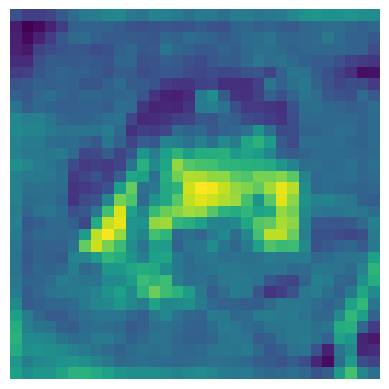

In [44]:
#to show first image of training data x_train
plt.imshow(x_train[0])
plt.axis('off')
plt.show()

In [45]:
#to show the category for first image of training data
y_train[0]

array([6], dtype=uint8)

In [46]:
#category user defined list object
"""
0.airplane
1.automobile
2.bird
3.cat
4.deer
5.dog
6.frog
7.horse
8.ship
9.truck
"""
#create list of class_labels
category=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(category)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [47]:
for i,v in enumerate(category):
  print(i,v)

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


In [48]:
y_train=y_train.flatten()
print(y_train)

[6 9 9 ... 9 1 1]


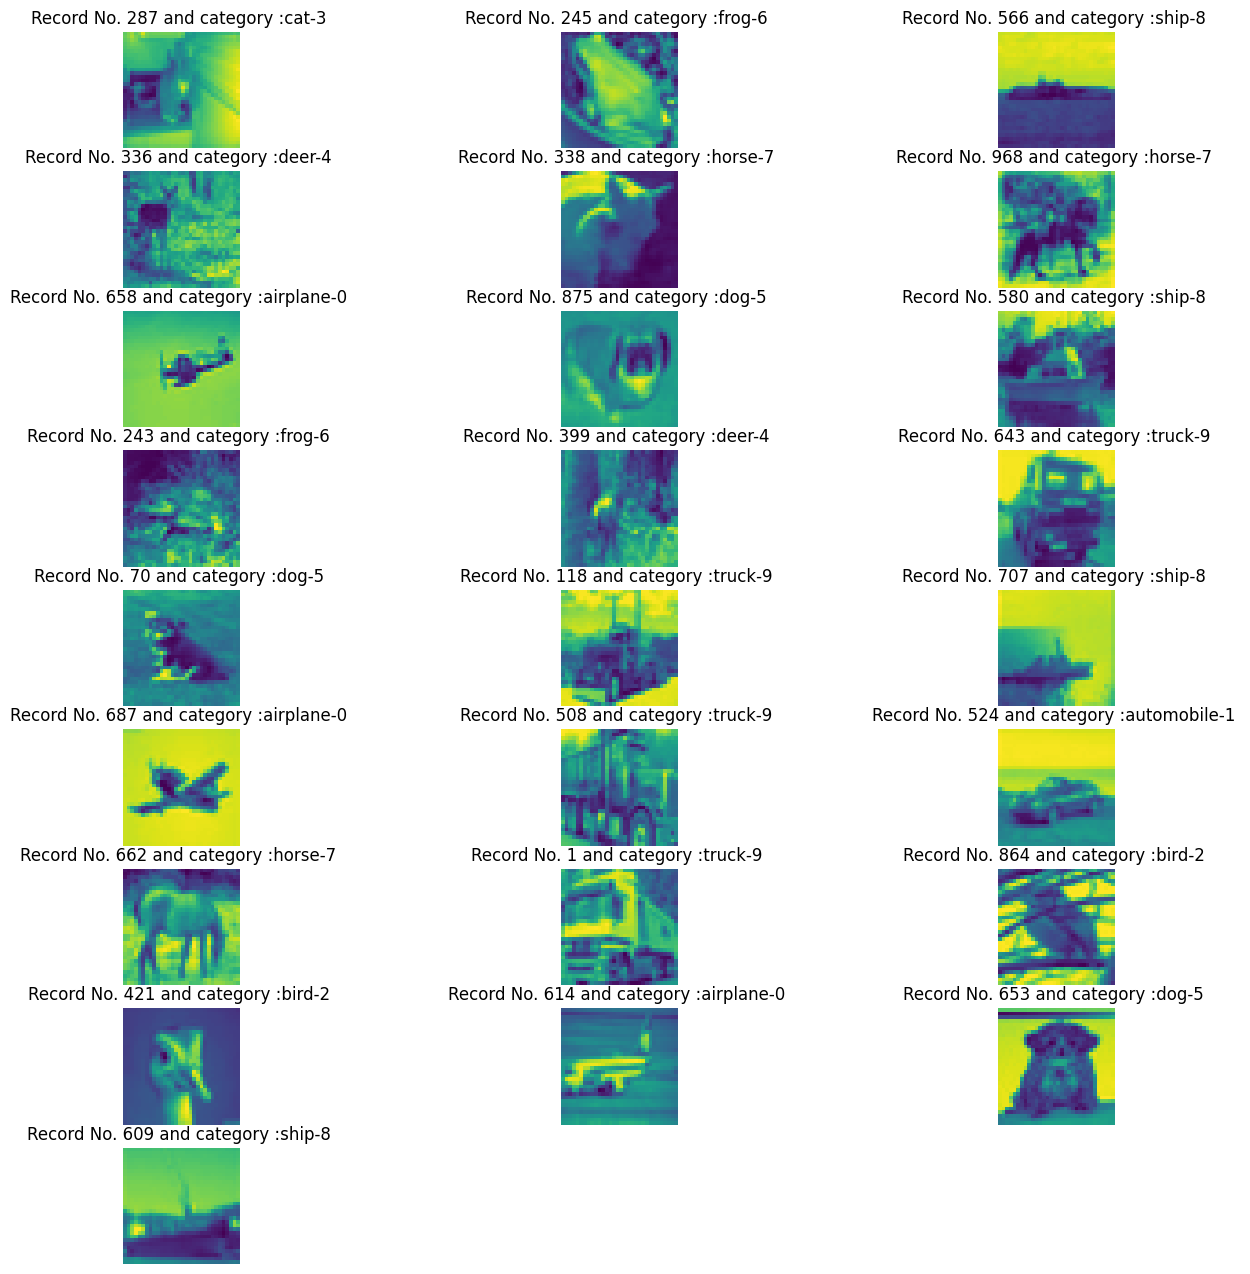

In [49]:
#to show 25 images randomly from first 1000 images from training data x_train
plt.figure(figsize=(16,16))
j=1 #column
for i in np.random.randint(0,1000,25):
  plt.subplot(9,3,j);j=j+1  #(9rows, 3column)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title('Record No. {} and category :{}-{} '.format(i,category[y_train[i]],y_train[i]))

In [50]:
#compulsory:4 dimension images required for training
#In CNN, we have to given 4 dimension input images compulsory
#but here,we have 3 dimension images
#check dimension of dataset
print("Dimension of training data :",x_train.ndim)

#check shape od dataset
print("Dimension of training data :",x_train.shape)

Dimension of training data : 3
Dimension of training data : (50000, 32, 32)


In [51]:
#convert 3 dimension to 4th dimension
#(60000,28,28,1):increase dimension in right then axis=-1
#(1,60000,28,28):increase dimension in left then axis=0

#converts 3 dimension images (input) into 4 dimension,use inbuilt function
#expand_dims() which define in numpy library
#first increase dimension of x_train from 3D to 4D
x_train=np.expand_dims(x_train,axis=-1)   #right side
#similar increase dimension of x_test from 3D to 4D
x_test=np.expand_dims(x_test,axis=-1)  #right side

In [52]:
#check dimension of dataset
print("Dimension of training data :",x_train.ndim)

#check shape od dataset
print("Dimension of training data :",x_train.shape)

Dimension of training data : 4
Dimension of training data : (50000, 32, 32, 1)


In [53]:
#check dimension of dataset
print("Dimension of testing data :",x_test.ndim)

#check shape od dataset
print("Dimension of testing data :",x_test.shape)

Dimension of testing data : 4
Dimension of testing data : (10000, 32, 32, 1)


In [54]:
#feature Scaling (MinMxaScaling):0-255:normalised
#formula of MinMaxScaler=(X-X_min())/(X.max()-X-Min())
#X.min()=0 and X.max()=255
x_train=x_train/255
x_test=x_test/255

In [55]:
#Split dataset x_train and y_train into 80% and 20%
#80% hold on x_train,y_train and 20% hold on x_val and y_val
#call train_test_split()

from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=1)

In [56]:
x_train.shape #CNN always take 4 dimension

(40000, 32, 32, 1)

In [57]:
x_val.shape

(10000, 32, 32, 1)

In [58]:
#Model Building:CNN(Convolutional Neural Network)
#create object of Sequential class
model=tensorflow.keras.Sequential([
    tensorflow.keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),      #kernal_size 3 by 3 means square strides means ek upper side jayega aur 1 niche side                     #GERYSCALE Conv2D   colouerd image ke liye Conv2D inbuilt hai for convolutional layer ka
                                   padding='valid',activation='relu',input_shape=[32,32,1]),    #input_shape[height,width,greyscale ke liye 1 and coolured image ke liye 3]
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(units=128,activation='relu'),  #hidden layer
    tensorflow.keras.layers.Dense(units=10,activation='softmax')   #output layer how many class=we have 10 class so we take units=10
    #why take softmax AF? bcoz more than 2 classes
])

In [59]:
#to compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [60]:
#create the procedure for EarlyStopping:
#with the help of EarlyStopping,decided the no. of iteration and also check  overfitting of model
#call inbuilt class EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

#create the object of EarlyStopping class and passing the following parameters 
es=EarlyStopping(
    monitor='val_loss',  #validation loss
    min_delta=0.00001,  #value of lambda/alpha
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [61]:
#train the model
trained_model=model.fit(x_train,y_train,batch_size=32,epochs=5000,callbacks=es,validation_data=(x_val,y_val))

Epoch 1/5000
1250/1250 [==============================] - 47s 37ms/step - loss: 1.6490 - accuracy: 0.4158 - val_loss: 1.4180 - val_accuracy: 0.5032
Epoch 2/5000
1250/1250 [==============================] - 47s 38ms/step - loss: 1.3482 - accuracy: 0.5278 - val_loss: 1.3348 - val_accuracy: 0.5384
Epoch 3/5000
1250/1250 [==============================] - 49s 39ms/step - loss: 1.2218 - accuracy: 0.5727 - val_loss: 1.2368 - val_accuracy: 0.5756
Epoch 4/5000
1250/1250 [==============================] - 46s 37ms/step - loss: 1.1238 - accuracy: 0.6100 - val_loss: 1.2356 - val_accuracy: 0.5674
Epoch 5/5000
1250/1250 [==============================] - 45s 36ms/step - loss: 1.0527 - accuracy: 0.6344 - val_loss: 1.1751 - val_accuracy: 0.5957
Epoch 6/5000
1250/1250 [==============================] - 47s 37ms/step - loss: 0.9851 - accuracy: 0.6569 - val_loss: 1.1568 - val_accuracy: 0.6040
Epoch 7/5000
1250/1250 [==============================] - 44s 35ms/step - loss: 0.9225 - accuracy: 0.6776 - val_

In [62]:
 #check training loss and training score,use evaluate() inbuilt method
model.evaluate(x_train,y_train)

1250/1250 [==============================] - 13s 10ms/step - loss: 0.1058 - accuracy: 0.9722


[0.10582008957862854, 0.9722499847412109]

In [ ]:
#check testing loss and testing score,use evaluate() inbuilt method
model.evaluate(x_val,y_val)

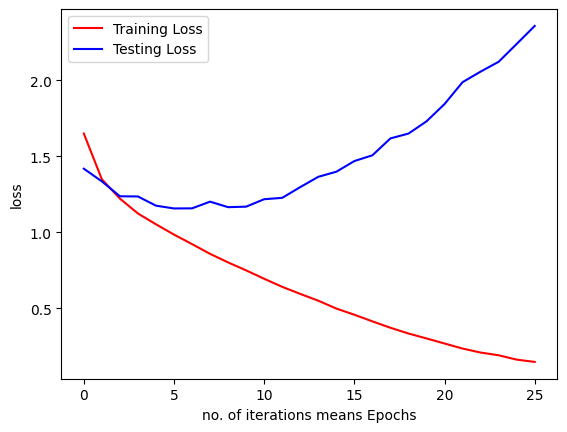

In [64]:
#visualisation training and validation loss
plt.plot(trained_model.history['loss'],label='Training Loss',color='red')
plt.plot(trained_model.history['val_loss'],label='Testing Loss',color='blue')
plt.xlabel("no. of iterations means Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

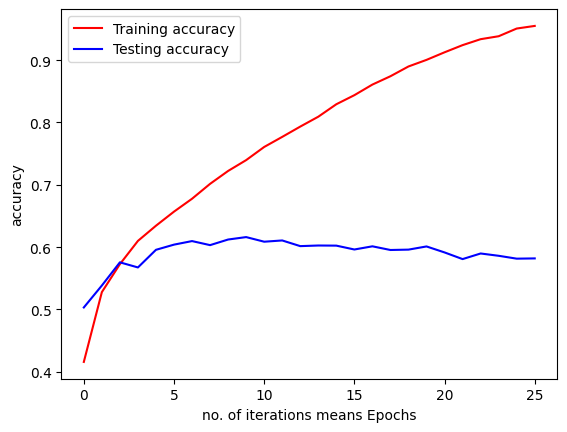

In [65]:
#visualisation accuracy of training and testing
plt.plot(trained_model.history['accuracy'],label='Training accuracy',color='red')
plt.plot(trained_model.history['val_accuracy'],label='Testing accuracy',color='blue')
plt.xlabel("no. of iterations means Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [66]:
#test the model with 30% data (x_test,y_test),use inbuilt method predict()
y_pred=model.predict(x_test).round(2)
#return the probability value of each class for each input images


313/313 [==============================] - 3s 9ms/step


In [67]:
y_pred

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.9 , 0.  , 0.02, ..., 0.08, 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ]], dtype=float32)

In [68]:
#list compprehension
y_pred1=[np.argmax(i) for i in y_pred]
y_pred1

[3,
 8,
 0,
 8,
 3,
 6,
 1,
 2,
 3,
 9,
 3,
 9,
 5,
 7,
 9,
 8,
 5,
 5,
 8,
 6,
 7,
 0,
 4,
 9,
 4,
 3,
 4,
 0,
 9,
 6,
 6,
 5,
 8,
 5,
 9,
 9,
 4,
 0,
 9,
 5,
 0,
 6,
 7,
 3,
 0,
 9,
 5,
 3,
 7,
 6,
 9,
 8,
 2,
 3,
 8,
 8,
 7,
 1,
 5,
 5,
 7,
 3,
 6,
 0,
 5,
 6,
 1,
 2,
 3,
 7,
 8,
 3,
 8,
 8,
 0,
 2,
 0,
 3,
 5,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 3,
 1,
 8,
 9,
 0,
 2,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 0,
 4,
 5,
 6,
 3,
 1,
 1,
 5,
 6,
 8,
 5,
 4,
 0,
 0,
 2,
 6,
 0,
 4,
 0,
 2,
 5,
 0,
 3,
 3,
 2,
 8,
 2,
 2,
 3,
 5,
 2,
 4,
 1,
 9,
 9,
 1,
 2,
 1,
 7,
 4,
 0,
 4,
 5,
 1,
 0,
 8,
 7,
 6,
 5,
 3,
 2,
 1,
 1,
 6,
 9,
 5,
 5,
 2,
 9,
 3,
 4,
 0,
 1,
 1,
 6,
 0,
 7,
 7,
 4,
 6,
 0,
 5,
 0,
 8,
 8,
 9,
 9,
 3,
 0,
 3,
 0,
 0,
 7,
 2,
 2,
 0,
 8,
 6,
 3,
 3,
 8,
 7,
 1,
 0,
 1,
 6,
 6,
 8,
 8,
 7,
 0,
 5,
 1,
 8,
 1,
 1,
 3,
 0,
 5,
 7,
 9,
 5,
 4,
 3,
 5,
 6,
 0,
 0,
 9,
 0,
 4,
 7,
 3,
 9,
 3,
 3,
 9,
 7,
 2,
 3,
 3,
 3,
 1,
 3,
 1,
 8,
 0,
 4,
 1,
 3,
 2,
 1,
 9,
 8,
 9,
 4,
 3,
 3,
 8,
 4,
 0,


In [69]:
y_pred2=[category[np.argmax(i)] for i in y_pred]
dict={'code':y_pred1,'category':y_pred2}
df2=pd.DataFrame(dict)
df2.head(10)

,code,category
0,3,cat
1,8,ship
2,0,airplane
3,8,ship
4,3,cat
5,6,frog
6,1,automobile
7,2,bird
8,3,cat
9,9,truck


In [70]:
#print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.59      0.62      0.60      1000
           1       0.68      0.75      0.72      1000
           2       0.47      0.39      0.43      1000
           3       0.36      0.41      0.39      1000
           4       0.54      0.49      0.52      1000
           5       0.45      0.48      0.46      1000
           6       0.60      0.65      0.63      1000
           7       0.67      0.62      0.64      1000
           8       0.66      0.74      0.69      1000
           9       0.74      0.59      0.66      1000

    accuracy                           0.57     10000
   macro avg       0.58      0.57      0.57     10000
weighted avg       0.58      0.57      0.57     10000



In [71]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred1))

[[619  31  66  32  33  19  20  16 134  30]
 [ 24 753   5  36   6  10  24   9  55  78]
 [103  10 390  99 119 112  81  42  34  10]
 [ 45  27  73 412  73 166 107  41  34  22]
 [ 46   9  86 113 489  68  87  71  25   6]
 [ 28   6  81 202  57 479  44  73  23   7]
 [ 25  27  50 108  46  60 651  11  11  11]
 [ 40  17  38  73  59 106  21 618  12  16]
 [ 79  60  21  26   8  14  16  11 736  29]
 [ 39 165  16  36   9  27  26  30  58 594]]


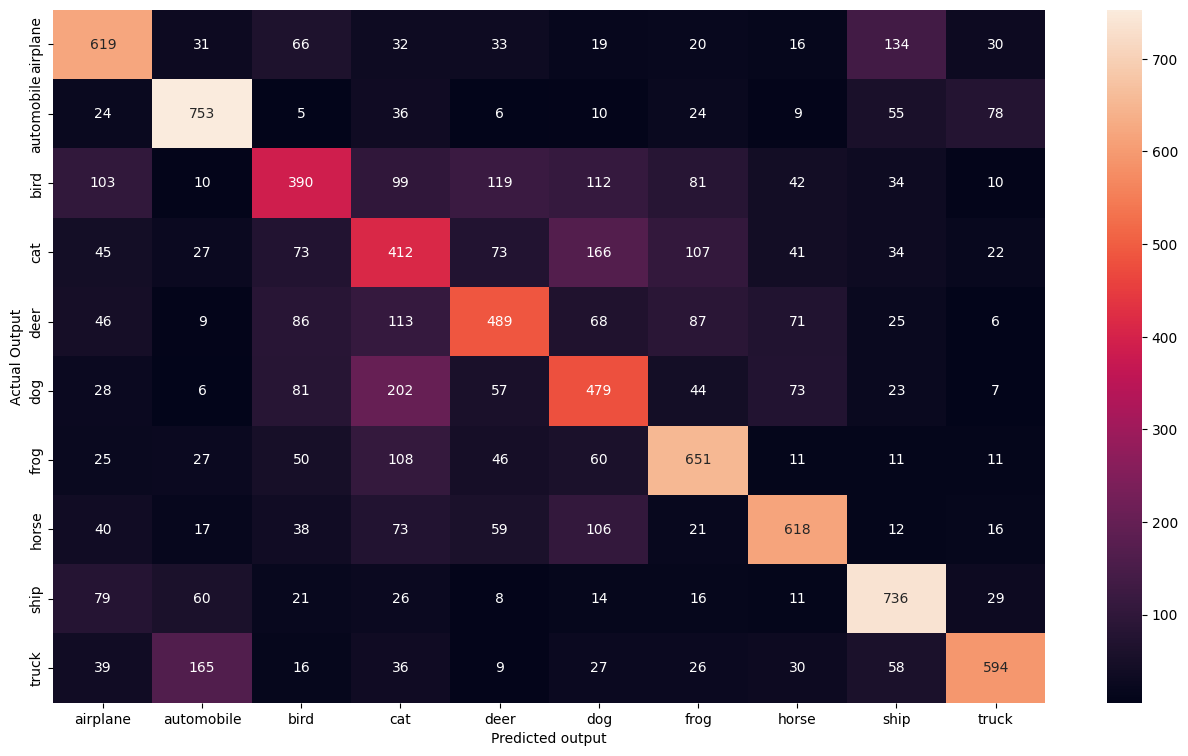

In [72]:
#create the object confusion matrix
cm=confusion_matrix(y_test,y_pred1)
plt.figure(figsize=(16,9))
sb.heatmap(cm,annot=True,fmt='d',xticklabels=category,yticklabels=category)  #fmt->format d means integer &if use f means float
plt.xlabel("Predicted output")
plt.ylabel("Actual Output")
plt.show()